# Explainability applications

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import torch

from src.datasets.imagenet import ImagenetDatasetS
from src.gradients import CheferGradients, ViTGradients
from src.vis import Vis

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

__TO-DO__: Define your path to the project folder and ImageNet-S dataset here:

In [4]:
PROJ_PATH = []
DATASET_PATH = []

In [5]:
# Define paths
PROJ_PATH = Path(PROJ_PATH)
DATASET_PATH = Path(DATASET_PATH)
RES_PATH = PROJ_PATH / 'results'

In [6]:
# Get dataset info
dataset = ImagenetDatasetS(DATASET_PATH)
stim_info = dataset.stim_info

## Visualization

In [7]:
def plot_ft_importance(model_name, img_info, save=True):
    """
    Plot feature importance results.
    """
    # Visualize feature importance
    if len(img_info) <= 6:
        fig, axes = plt.subplots(nrows=1, ncols=len(img_info), figsize=(10, 3))
    else:
        fig, axes = plt.subplots(nrows=2, ncols=int(len(img_info)/2), figsize=(12, 5))
    
    for i, ax in zip(img_info, axes.flat):
        
        # Compute importance by gradients
        grads, _ = ViTGradients(model_name, PROJ_PATH, DATASET_PATH).compute(i[0], i[1], i[2])
        importance = []
        for b in range(12):
            importance.append(torch.sum(grads[b], dim=0)[0])
        mask = torch.sum(torch.stack(importance), dim=0)[1:]
        mask = - mask

        # Plot heatmap over image
        vis = Vis(PROJ_PATH, DATASET_PATH, model_name, 'cpu')
        mask_vis = vis.mask(i[0], i[1], mask)
        ax.imshow(mask_vis)
        ax.set_xticks([])
        ax.set_yticks([])
        if i[2] == 582:
            cat = 'grocery store'
        else:
            cat = stim_info[stim_info['index'] == i[2]]['cat'].unique()[0].split(',')[0].lower()
        ax.set_title(cat)

    f = RES_PATH / 'figures' / f'explainability_{model_name}.png'
    plt.tight_layout()
    if save:
        plt.savefig(f, dpi=300)
    plt.show()
    
    return

### ViT-B/32

#### Sum over gradients

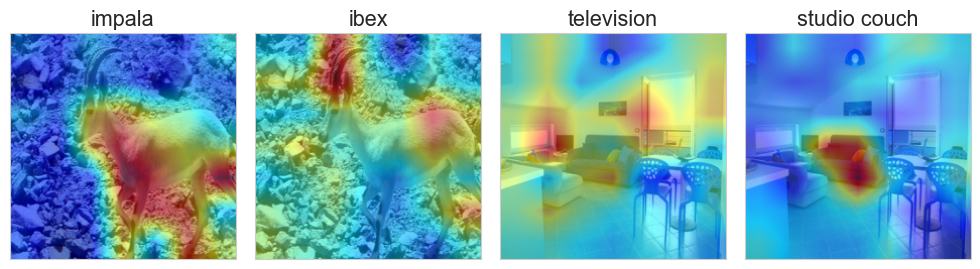

In [8]:
# Select some images and different classes
# [imagenet_class, imagenet_id, class_id]
img_info = [
    ['n02422699', 0, 352], ['n02422699', 0, 350],
    ['n04404412', 1, 851], ['n04404412', 1, 831],
]

plot_ft_importance('vit_b_32', img_info)

Repeat with other examples:

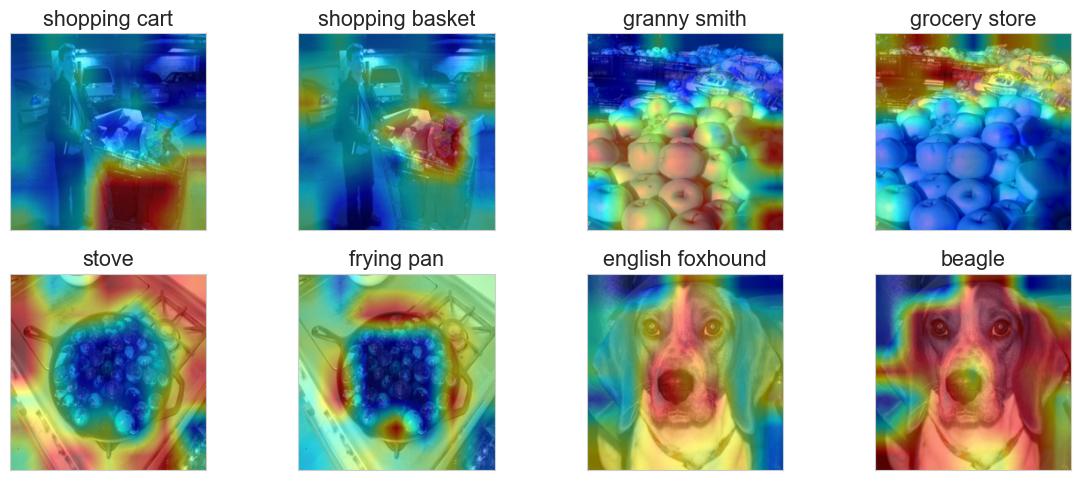

In [9]:
img_info = [
    ['n04204347', 1, 791], ['n04204347', 1, 790],
    ['n07742313', 0, 948], ['n07742313', 0, 582],
    ['n04330267', 3, 827], ['n04330267', 3, 567],
    ['n02089973', 0, 167], ['n02089973', 0, 162],
]

plot_ft_importance('vit_b_32', img_info, save=False)

#### Head-specific visualization

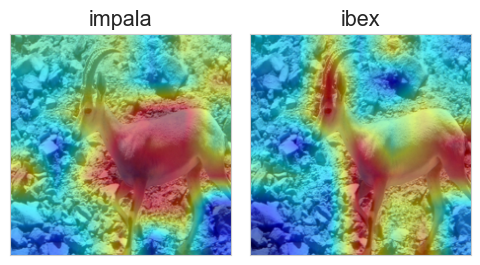

In [10]:
model_name = 'vit_b_32'
b = 7  # block index
h = 0  # head index

# Select different classes
imgs_info = [['n02422699', 0, 352], ['n02422699', 0, 350]]

# Get gradients
vis = Vis(PROJ_PATH, DATASET_PATH, model_name, 'cpu')
g = ViTGradients(model_name, PROJ_PATH, DATASET_PATH)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
for i, ax in zip(imgs_info, axes.flat):
    grads, _ = g.compute(i[0], i[1], i[2])
    mask = - grads[b][h, 0, 1:]
    mask_vis = vis.mask(i[0], i[1], mask)
    ax.imshow(mask_vis)
    ax.set_xticks([])
    ax.set_yticks([])
    cat = stim_info[stim_info['index'] == i[2]]['cat'].unique()[0].split(',')[0].lower()
    ax.set_title(cat)
f = RES_PATH / 'figures' / f'explainability_{model_name}_head_1.png'
plt.tight_layout()
plt.savefig(f, dpi=300)
plt.show()

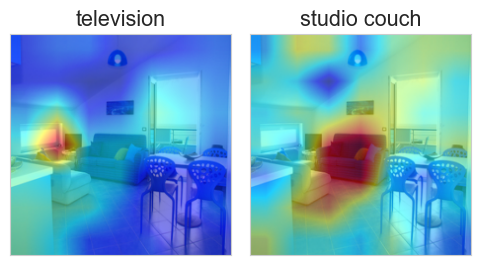

In [11]:
model_name = 'vit_b_32'
b = 11  # block index
h = 6  # head index

# Select different classes
imgs_info = [['n04404412', 1, 851], ['n04404412', 1, 831]]

# Get gradients
vis = Vis(PROJ_PATH, DATASET_PATH, model_name, 'cpu')
g = ViTGradients(model_name, PROJ_PATH, DATASET_PATH)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
for i, ax in zip(imgs_info, axes.flat):
    grads, _ = g.compute(i[0], i[1], i[2])
    mask = - grads[b][h, 0, 1:]
    mask_vis = vis.mask(i[0], i[1], mask)
    ax.imshow(mask_vis)
    ax.set_xticks([])
    ax.set_yticks([])
    cat = stim_info[stim_info['index'] == i[2]]['cat'].unique()[0].split(',')[0].lower()
    ax.set_title(cat)
f = RES_PATH / 'figures' / f'explainability_{model_name}_head_2.png'
plt.tight_layout()
plt.savefig(f, dpi=300)
plt.show()

#### Comparison all - Figure

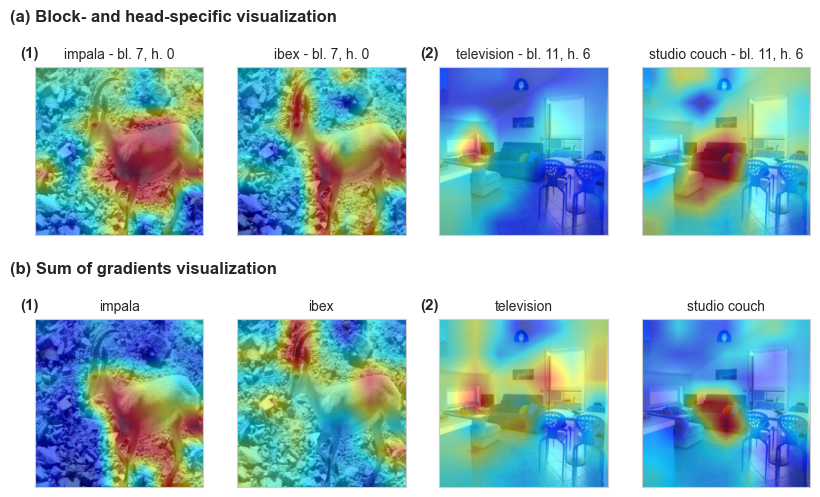

In [12]:
model_name = 'vit_b_32'

# Select different images, classes, blocks and head
img_info = [
    ['n02422699', 0, 352, 7, 0], ['n02422699', 0, 350, 7, 0],
    ['n04404412', 1, 851, 11, 6], ['n04404412', 1, 831, 11, 6],
] # [imagenet_id, image_id, class_id, block, attention head]

# Compute gradients
vis = Vis(PROJ_PATH, DATASET_PATH, model_name, 'cpu')
g = ViTGradients(model_name, PROJ_PATH, DATASET_PATH)

# Plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))
#fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))
for i, ax in zip(img_info, axes.flat[:4]):
    b = i[3]
    h = i[4]
    grads, _ = g.compute(i[0], i[1], i[2])
    mask = - grads[b][h, 0, 1:]
    mask_vis = vis.mask(i[0], i[1], mask)
    ax.imshow(mask_vis)
    ax.set_xticks([])
    ax.set_yticks([])
    cat = stim_info[stim_info['index'] == i[2]]['cat'].unique()[0].split(',')[0].lower()
    ax.set_title(f'{cat} - bl. {b}, h. {h}', fontsize=10)
    
for i, ax in zip(img_info, axes.flat[4:]):    
    # Compute importance by gradients
    grads, _ = g.compute(i[0], i[1], i[2])
    importance = []
    for b in range(12):
        importance.append(torch.sum(grads[b], dim=0)[0])
    mask = torch.sum(torch.stack(importance), dim=0)[1:]
    mask = - mask

    # Plot heatmap over image
    mask_vis = vis.mask(i[0], i[1], mask)
    ax.imshow(mask_vis)
    ax.set_xticks([])
    ax.set_yticks([])
    if i[2] == 582:
        cat = 'grocery store'
    else:
        cat = stim_info[stim_info['index'] == i[2]]['cat'].unique()[0].split(',')[0].lower()
    ax.set_title(cat, fontsize=10)

fig.text(x=0.1, y=0.92, s='(a) Block- and head-specific visualization', weight='bold', fontsize=12)
fig.text(x=0.1, y=0.5, s='(b) Sum of gradients visualization', weight='bold', fontsize=12)
fig.text(x=0.11, y=0.86, s='(1)', weight='bold', fontsize=11)
fig.text(x=0.51, y=0.86, s='(2)', weight='bold', fontsize=11)
fig.text(x=0.11, y=0.44, s='(1)', weight='bold', fontsize=11)
fig.text(x=0.51, y=0.44, s='(2)', weight='bold', fontsize=11)

f = RES_PATH / 'figures' / f'explainability_{model_name}_v2.png'
plt.savefig(f, dpi=200)
plt.show()

### ViT-B/16

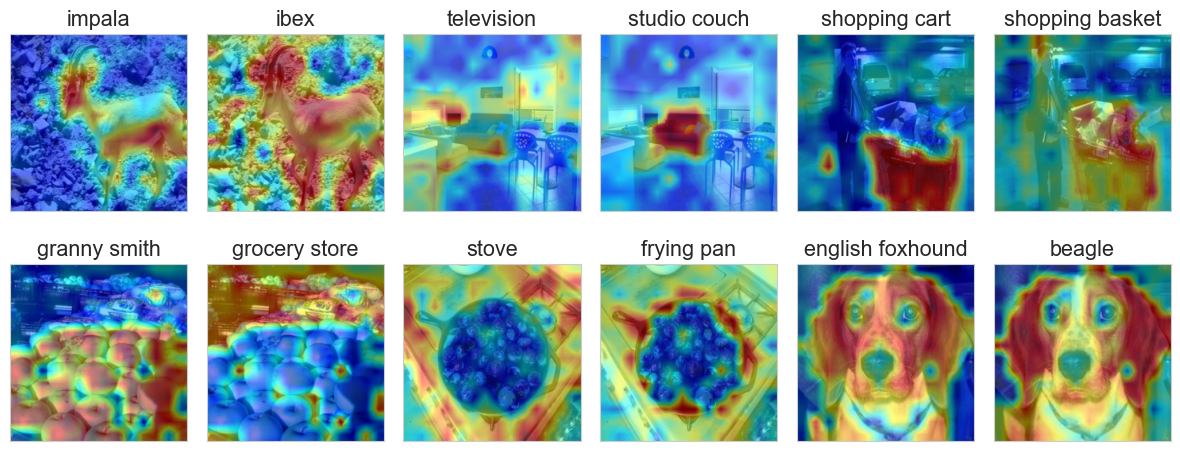

In [13]:
img_info = [
    ['n02422699', 0, 352], ['n02422699', 0, 350],
    ['n04404412', 1, 851], ['n04404412', 1, 831],
    ['n04204347', 1, 791], ['n04204347', 1, 790],
    ['n07742313', 0, 948], ['n07742313', 0, 582],
    ['n04330267', 3, 827], ['n04330267', 3, 567],
    ['n02089973', 0, 167], ['n02089973', 0, 162],
]
plot_ft_importance('vit_b_16', img_info)

## Perturbation experiment

In [14]:
def plot_perturbation(model_name, perturb_type, random=False):
    """ 
    Plot perturbation experiment results.
    """
    labels = torch.arange(48) / 49 * 100
    
    fig, ax = plt.subplots(figsize=(6,4))
    
    f = RES_PATH / 'perturbation' / model_name / f'{perturb_type}_grads.pt'
    emb_perturb = torch.load(f, map_location='cpu')
    emb_perturb = torch.flip(emb_perturb, dims=(0,)).detach().numpy()
    sns.lineplot(x=labels, y=emb_perturb, ax=ax, label='cls-emb removal')
    print(f'AUC emb: {np.sum(emb_perturb) / (np.max(emb_perturb) * 49)}')
    
    f = RES_PATH / 'perturbation' / model_name / f'{perturb_type}_grads_chefer.pt'
    chefer_perturb = torch.load(f, map_location='cpu')
    chefer_perturb = torch.flip(chefer_perturb, dims=(0,)).detach().numpy()
    sns.lineplot(x=labels, y=chefer_perturb, ax=ax, label='chefer removal')
    print(f'AUC chefer: {np.sum(chefer_perturb) / (np.max(chefer_perturb) * 49)}')
    
    if random == True:
        f = RES_PATH / 'perturbation' / model_name / 'perturb_random.pt'
        rand_perturb = torch.mean(torch.load(f, map_location='cpu'), dim=0)
        rand_perturb = torch.flip(rand_perturb, dims=(0,)).detach().numpy()
        sns.lineplot(x=labels, y=rand_perturb, ax=ax, label='random removal')
        print(f'AUC random: {np.sum(rand_perturb) / (np.max(rand_perturb) * 49)}')
    
    ax.hlines(
        xmin=-0.5, xmax=100.5, y=emb_perturb[0], colors='dimgray', linestyles='--', lw=2, 
        label='baseline accuracy'
    )
    ax.set_xticks(np.arange(0, 100, 10))
    ax.set_xlim(-0.5, 95)
    ax.set_ylim(0,0.9)
    ax.set_xlabel('percentage of tokens removed')
    ax.set_ylabel('accuracy')
    ax.legend()
    plt.tight_layout()
    f = RES_PATH / 'figures' / f'neg_perturb_{model_name}.png'
    plt.savefig(f, dpi=300)
    plt.show()

    return

### Negative perturbation

AUC emb: 0.8362941079403841
AUC chefer: 0.8454036573533792
AUC random: 0.7158862672691159


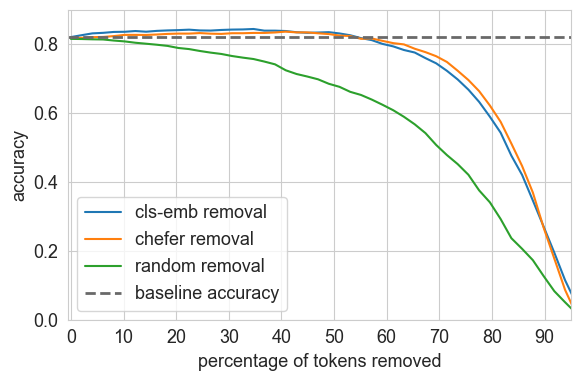

In [16]:
plot_perturbation('vit_b_32', 'negative', random=True)

### Positive perturbation

AUC emb: 0.41281954233979434
AUC chefer: 0.39287127006033656
AUC random: 0.7158862672691159


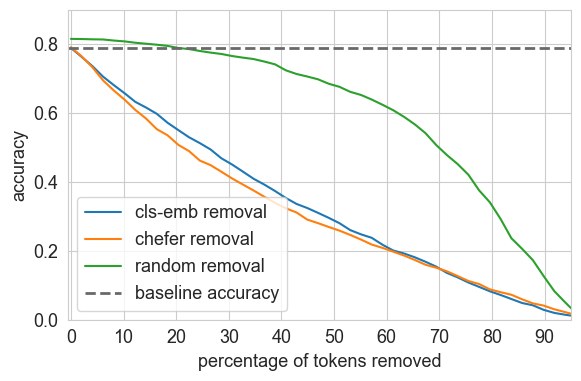

In [17]:
plot_perturbation('vit_b_32', 'positive', random=True)